# Image Pooling

Import necessary libraries for image processing and neural network
operations.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from skimage import io, color

Load an image and convert it to grayscale.

In [2]:
img_raw = io.imread('./data/dotonbori.jpg')
img = color.rgb2gray(img_raw)
print(img.shape)

(1068, 1600)

Convert the grayscale image to a tensor and add batch and channel
dimensions.

In [3]:
img_tensor = torch.tensor(img, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

print(img_tensor.shape)

torch.Size([1, 1, 1068, 1600])

Apply max pooling and average pooling to the image tensor to reduce its
dimensions.

Pooling operations serve two main purposes in convolutional neural
networks:

1.  **Dimensionality reduction:** By summarizing local regions, pooling
    reduces spatial dimensions and computational complexity.
2.  **Translation invariance:** Pooling makes features more robust to
    small translations in the input.

-   **Max pooling** selects the maximum value in each local region,
    preserving the strongest features.
-   **Average pooling** computes the mean value in each region,
    providing a smoother representation.

In [4]:
max_pool = nn.MaxPool2d(kernel_size=4, stride=4)
avg_pool = nn.AvgPool2d(kernel_size=4, stride=4)
img_max_pooled = max_pool(img_tensor).squeeze(0).squeeze(0)
img_avg_pooled = avg_pool(img_tensor).squeeze(0).squeeze(0)
print(img_max_pooled.shape)
print(img_avg_pooled.shape)

torch.Size([267, 400])
torch.Size([267, 400])

Plot the original and pooled images for comparison.

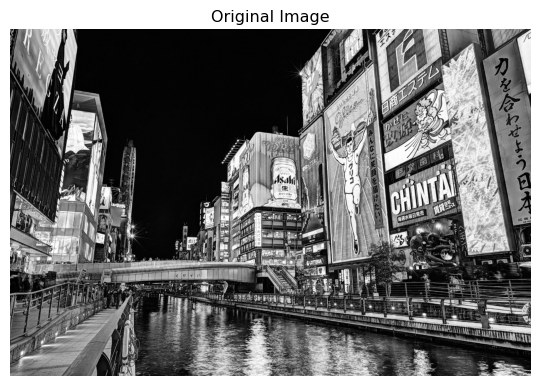

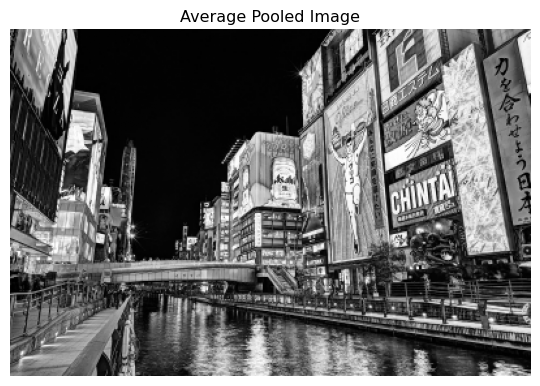

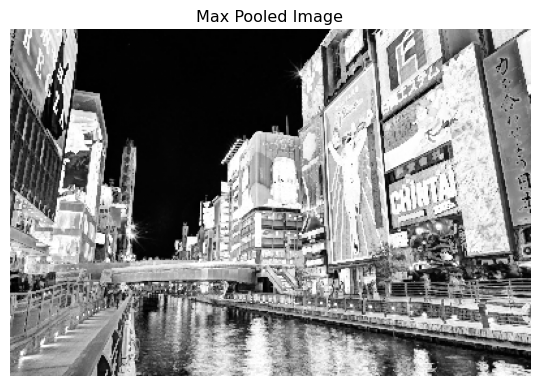

In [5]:
fig1, ax1 = plt.subplots(figsize=(7, 7))
ax1.imshow(img, cmap='gray')
ax1.set_title('Original Image')
plt.axis("off")

fig2, ax2 = plt.subplots(figsize=(7, 7))
ax2.imshow(img_avg_pooled.numpy(), cmap='gray')
ax2.set_title('Average Pooled Image')
plt.axis("off")

fig3, ax3 = plt.subplots(figsize=(7, 7))
ax3.imshow(img_max_pooled.numpy(), cmap='gray')
ax3.set_title('Max Pooled Image')
plt.axis("off")

plt.show()